<a href="https://colab.research.google.com/github/boomyun713/114_homework/blob/main/W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt

In [ ]:
stock_id = "2454.tw"
end = dt.date.today()
start = end - dt.timedelta(days=180)
df = yf.download(stock_id, start=start, end=end).reset_index()
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-3519415838.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-24,1451.428345,1475.945715,1451.428345,1471.042241,3925730
1,2025-03-25,1495.559570,1510.269992,1475.945674,1475.945674,7987673
2,2025-03-26,1485.752686,1510.270057,1485.752686,1505.366582,3637846
3,2025-03-27,1456.331787,1480.849157,1451.428313,1471.042209,4779867
4,2025-03-28,1436.717896,1466.138740,1426.910947,1441.621370,4529681
...,...,...,...,...,...,...
120,2025-09-15,1485.000000,1495.000000,1480.000000,1490.000000,2733745
121,2025-09-16,1535.000000,1545.000000,1495.000000,1500.000000,8152357
122,2025-09-17,1510.000000,1545.000000,1510.000000,1545.000000,4695051
123,2025-09-18,1510.000000,1530.000000,1495.000000,1525.000000,3539535


In [ ]:
df['8_SMA'] = df['Close'].rolling(window=8).mean()
df['13_SMA'] = df['Close'].rolling(window=13).mean()
df['20_SMA'] = df['Close'].rolling(window=20).mean()

df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
120,2025-09-15,1485.0,1495.0,1480.0,1490.0,2733745,1462.500,1428.461538,1412.75
121,2025-09-16,1535.0,1545.0,1495.0,1500.0,8152357,1481.250,1440.000000,1420.00
122,2025-09-17,1510.0,1545.0,1510.0,1545.0,4695051,1490.625,1450.769231,1427.75
123,2025-09-18,1510.0,1530.0,1495.0,1525.0,3539535,1500.625,1462.307692,1435.00
124,2025-09-19,1440.0,1505.0,1440.0,1500.0,13241946,1491.875,1468.461538,1438.75


In [ ]:
df['Change'] = df['Close'] - df['Close'].shift(1)
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)
df.tail()

df['Avg Gain'] = df['Gain'].rolling(window=14).mean()
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()
df['RS'] = df['Avg Gain'] / df['Avg Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
120,2025-09-15,1485.0,1495.0,1480.0,1490.0,2733745,1462.500,1428.461538,1412.75,0.0,0.0,0.0,12.142857,6.071429,2.000000,66.666667
121,2025-09-16,1535.0,1545.0,1495.0,1500.0,8152357,1481.250,1440.000000,1420.00,50.0,50.0,0.0,15.714286,6.071429,2.588235,72.131148
122,2025-09-17,1510.0,1545.0,1510.0,1545.0,4695051,1490.625,1450.769231,1427.75,-25.0,0.0,25.0,15.714286,6.785714,2.315789,69.841270
123,2025-09-18,1510.0,1530.0,1495.0,1525.0,3539535,1500.625,1462.307692,1435.00,0.0,0.0,0.0,15.714286,5.714286,2.750000,73.333333
124,2025-09-19,1440.0,1505.0,1440.0,1500.0,13241946,1491.875,1468.461538,1438.75,-70.0,0.0,70.0,15.714286,10.000000,1.571429,61.111111


In [ ]:
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()
df['MACD'] = df['EMA_8'] - df['EMA_13']
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2025-03-24,1451.428345,1475.945715,1451.428345,1471.042241,3925730,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1451.428345,1451.428345,0.000000
1,2025-03-25,1495.559570,1510.269992,1475.945674,1475.945674,7987673,NaN,NaN,NaN,44.131226,44.131226,0.000000,NaN,NaN,NaN,NaN,1461.235284,1457.732806,3.502478
2,2025-03-26,1485.752686,1510.270057,1485.752686,1505.366582,3637846,NaN,NaN,NaN,-9.806885,0.000000,9.806885,NaN,NaN,NaN,NaN,1466.683595,1461.735646,4.947950


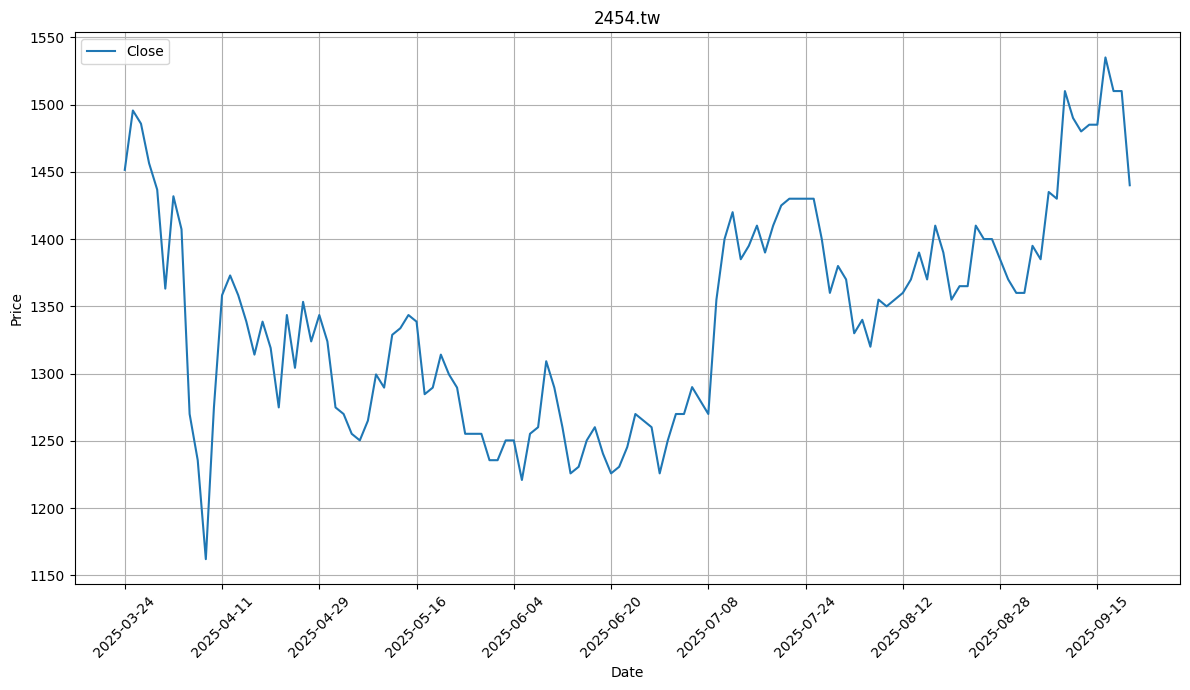

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(df['Close'], label='Close')
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num],
           rotation = 45)

plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

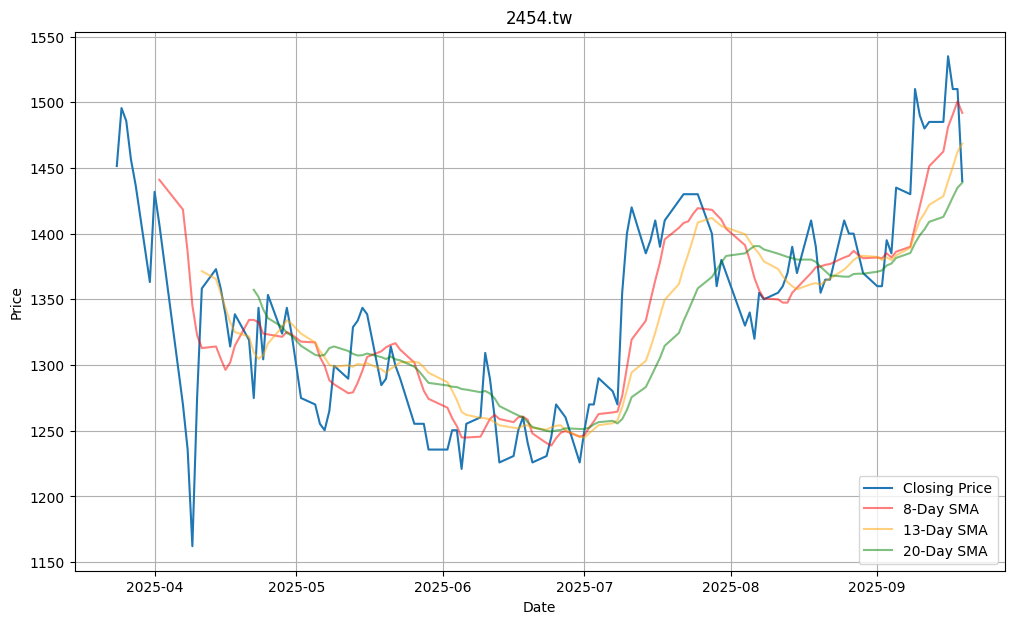

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
kplot_df = df.set_index('Date')
kplot_df['2025-07-01':'2025-09-19'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-15,1485.0,1495.0,1480.0,1490.0,2733745,1462.500,1428.461538,1412.75,0.0,0.0,0.0,12.142857,6.071429,2.000000,66.666667,1462.880177,1444.420730,18.459447
2025-09-16,1535.0,1545.0,1495.0,1500.0,8152357,1481.250,1440.000000,1420.00,50.0,50.0,0.0,15.714286,6.071429,2.588235,72.131148,1478.906804,1457.360626,21.546178
2025-09-17,1510.0,1545.0,1510.0,1545.0,4695051,1490.625,1450.769231,1427.75,-25.0,0.0,25.0,15.714286,6.785714,2.315789,69.841270,1485.816403,1464.880537,20.935867
2025-09-18,1510.0,1530.0,1495.0,1525.0,3539535,1500.625,1462.307692,1435.00,0.0,0.0,0.0,15.714286,5.714286,2.750000,73.333333,1491.190536,1471.326174,19.864362
2025-09-19,1440.0,1505.0,1440.0,1500.0,13241946,1491.875,1468.461538,1438.75,-70.0,0.0,70.0,15.714286,10.000000,1.571429,61.111111,1479.814861,1466.851006,12.963855


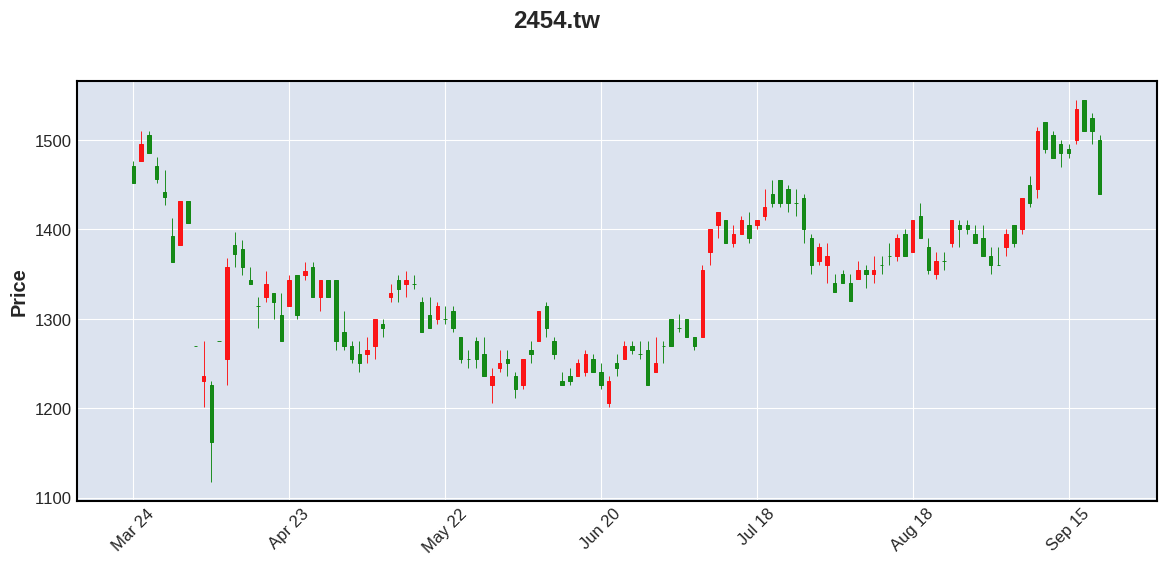

In [ ]:
import mplfinance as mpf
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

In [ ]:
import pandas as pd
import numpy as np

df = df.copy()

num_cols = ['Open','High','Low','Close']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    if df.index.name is None:
        df = df.reset_index().rename(columns={'index':'Date'})
    else:
        df = df.reset_index().rename(columns={df.index.name:'Date'})
    df['Date'] = pd.to_datetime(df['Date'])

df['body_length']  = (df['Close'] - df['Open']).abs()
df['lower_shadow'] = (df[['Open','Close']].min(axis=1) - df['Low']).abs()
df['upper_shadow'] = (df['High'] - df[['Open','Close']].max(axis=1)).abs()

hammer_condition = (
    (df['lower_shadow'] >= 1.5 * df['body_length']) &
    (df['upper_shadow'] <= 0.3 * df['body_length']) &
    (df['body_length'] <= 0.4 * (df['High'] - df['Low']))
)

print("命中筆數：", int(hammer_condition.sum()))
hammer_df = df.loc[hammer_condition].copy()
hammer_df.set_index('Date', inplace=True)

hammer_df.head(10)


命中筆數： 3


Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-07,1269.999756,1269.999756,1269.999756,1269.999756,1801849,1418.329880,NaN,NaN,-137.297363,0.000000,...,NaN,NaN,NaN,NaN,1394.109087,1413.384547,-19.275460,0.000000,0.000000,0.0
2025-04-10,1274.903320,1274.903320,1274.903320,1274.903320,1930024,1322.712158,NaN,NaN,112.779907,112.779907,...,NaN,NaN,NaN,NaN,1306.224290,1344.183171,-37.958881,0.000000,0.000000,0.0
2025-04-21,1319.034546,1328.841494,1299.420649,1328.841494,3022376,1334.357910,1321.674889,NaN,-19.613892,0.000000,...,21.715384,30.121338,0.72093,41.891893,1330.142034,1340.046840,-9.904807,9.806948,19.613897,0.0


In [ ]:
df['body_length'] = abs(df['Close'] - df['Open'])
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1
)

doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-07,1269.999756,1269.999756,1269.999756,1269.999756,1801849,1418.329880,NaN,NaN,-137.297363,0.000000,...,NaN,NaN,NaN,NaN,1394.109087,1413.384547,-19.275460,0.000000,0.000000,0.000000
2025-04-08,1235.675537,1274.903332,1201.351217,1230.772063,18444110,1385.844376,NaN,NaN,-34.324219,0.000000,...,NaN,NaN,NaN,NaN,1358.901631,1387.997546,-29.095914,4.903474,29.420846,39.227795
2025-04-10,1274.903320,1274.903320,1274.903320,1274.903320,1930024,1322.712158,NaN,NaN,112.779907,112.779907,...,NaN,NaN,NaN,NaN,1306.224290,1344.183171,-37.958881,0.000000,0.000000,0.000000
2025-04-17,1314.131104,1323.938052,1289.613732,1314.131104,6686132,1301.872406,1332.613403,NaN,-24.517334,0.000000,...,19.964146,32.222831,0.619565,38.255035,1331.791934,1344.365631,-12.573697,0.000000,24.517371,9.806949
2025-05-16,1338.648438,1348.455386,1333.744963,1338.648438,3498707,1306.162918,1301.306594,1308.737244,-4.903442,0.000000,...,8.756208,9.806955,0.892857,47.169808,1318.503193,1313.839687,4.663506,0.000000,4.903474,9.806948
2025-05-22,1299.420654,1314.131077,1294.517180,1299.420654,3287944,1316.582809,1299.420645,1304.324115,-14.710449,0.000000,...,9.456709,7.705470,1.227272,55.102027,1306.090015,1306.652272,-0.562257,0.000000,4.903474,14.710423
2025-05-27,1255.289429,1265.096377,1245.482480,1255.289429,6424061,1290.839569,1301.683791,1295.252692,0.000000,0.000000,...,9.456709,9.106454,1.038462,50.943413,1283.805718,1291.237085,-7.431368,0.000000,9.806949,9.806949
2025-06-27,1260.192871,1274.903294,1255.289397,1260.192871,5856843,1249.772964,1250.385892,1251.856940,-4.903442,0.000000,...,9.106445,9.106445,1.000000,50.000000,1254.208043,1253.883938,0.324105,0.000000,4.903474,14.710423
2025-07-02,1269.999756,1274.903230,1250.385860,1269.999756,6784867,1252.224686,1248.122746,1252.347284,19.613892,19.613892,...,8.756199,8.055708,1.086956,52.083320,1253.246988,1252.817469,0.429519,0.000000,19.613896,4.903474


In [ ]:
doji_df.index

DatetimeIndex(['2025-04-07', '2025-04-08', '2025-04-10', '2025-04-17',
               '2025-05-16', '2025-05-22', '2025-05-27', '2025-06-27',
               '2025-07-02', '2025-07-04', '2025-07-25', '2025-08-12',
               '2025-08-13', '2025-08-22', '2025-09-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

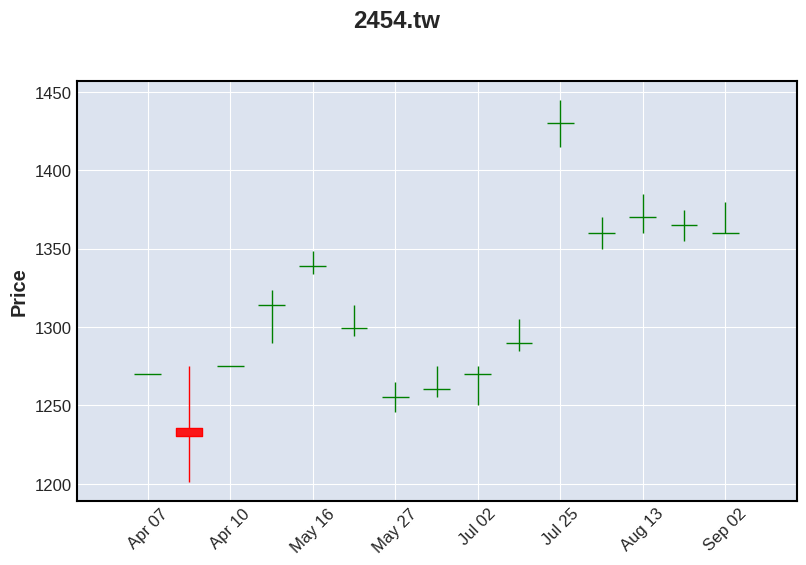

In [ ]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
n = 1
df['Future_Price'] = df['Close'].shift(-n)

df.dropna(inplace=True)

X = df[['20_SMA', 'RSI', 'MACD']]

y = df['Future_Price']

X.shape, y.shape

((72, 3), (72,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57, 3), (15, 3), (57,), (15,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 27.98
線性回歸模型預測未來1天的價格: 1357.12


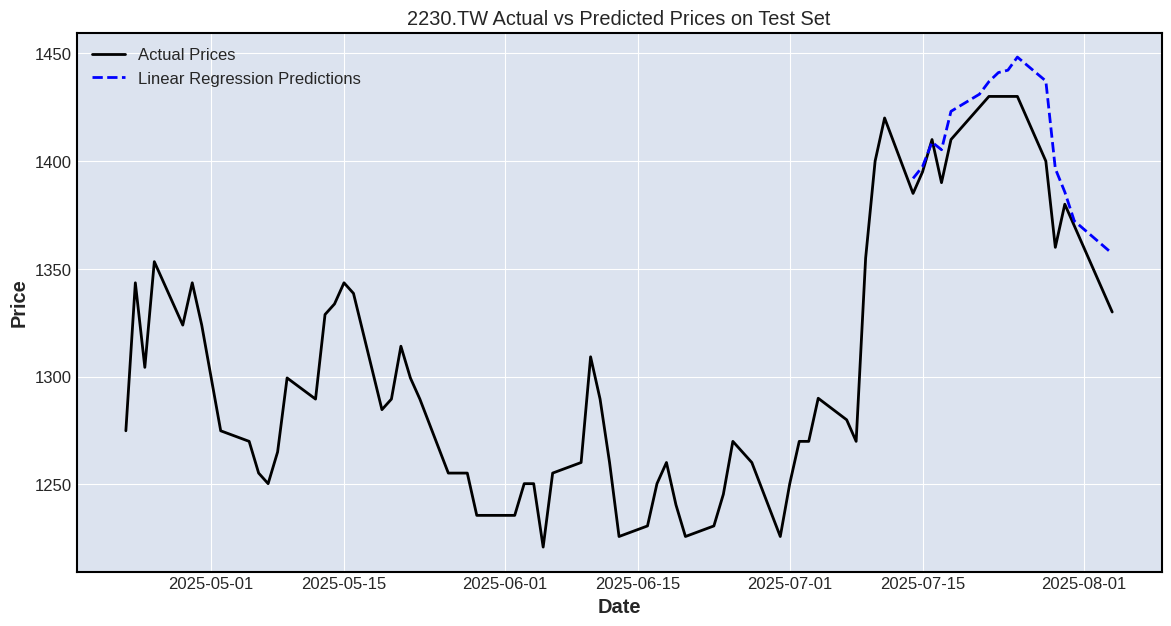

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 48.63
決策樹模型預測未來1天的價格: 1255.29


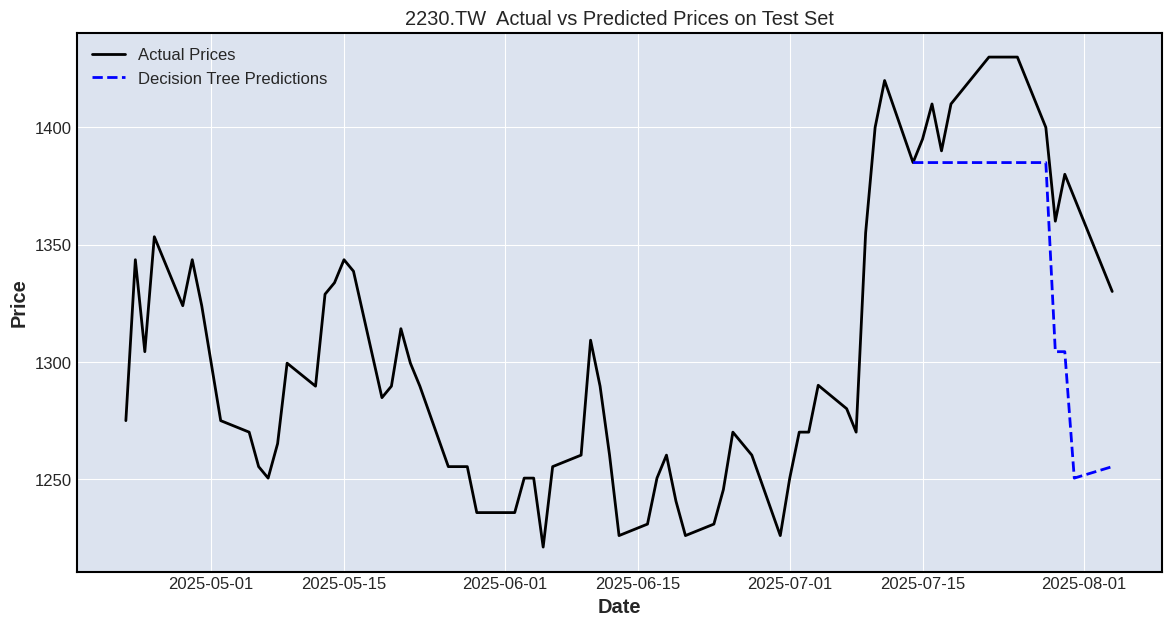

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 38.03
隨機森林模型預測未來1天的價格: 1289.07


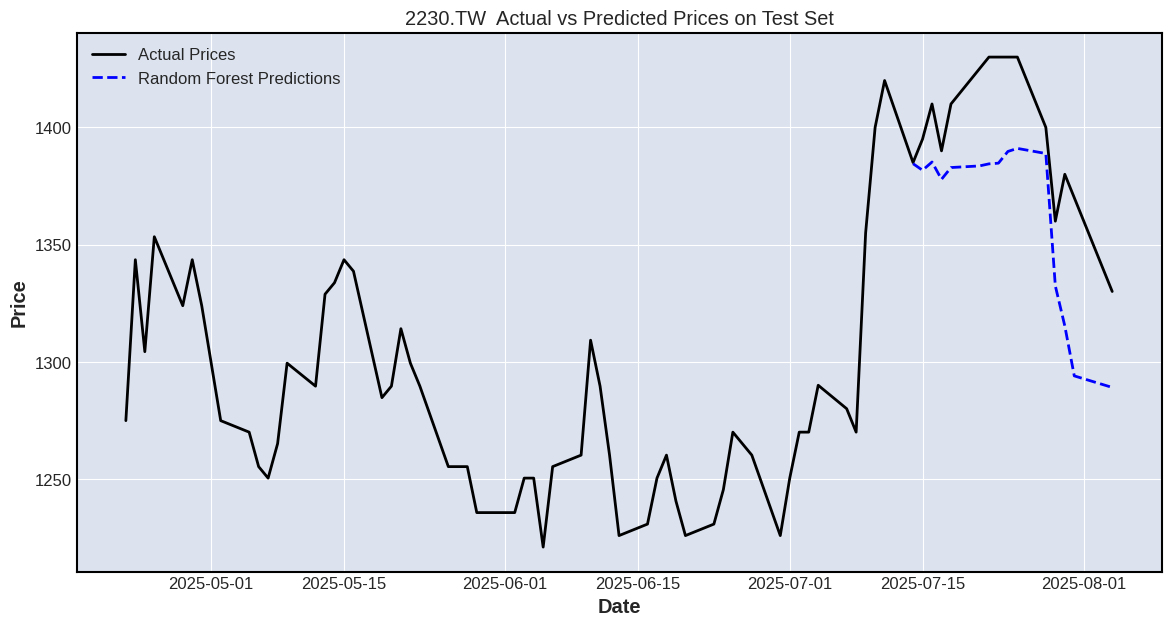

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()